In [1]:
# if i want to plot higher dimensional data, I'll use Dimensionality reduction first
# Principal Component analysis is used for this
# PCA works well with Linear sort of data but struggles with Non Linear Data as it doesn't really captures geometrical relationship between 2 points
# A better approach will be t-sne while it has some drawbacks but for visualisation it's one of the good
# now this approach also captures higher dimensional data into lower dimension and they are called embedding
# # keep the n_component between 2 - 3 only greater than that will cause problem while plotting

### Mnist

In [2]:
import pandas as pd
from keras.datasets import mnist

In [3]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
df = df.rename(columns={'6': 'label'})

In [4]:
df.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt


In [6]:
df.shape

(19999, 785)

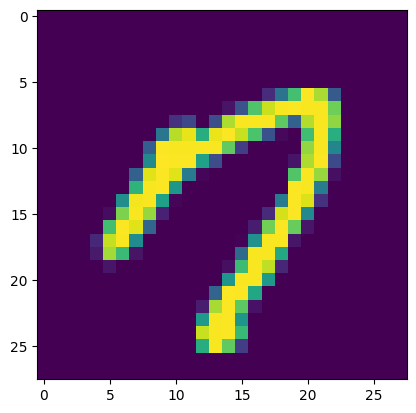

In [7]:
plt.imshow(df.iloc[1,1:].values.reshape(28,28))

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, verbose=1, random_state=123) # keep the n_component between 2 - 3 only greater than that will cause problem while plotting
z = tsne.fit_transform(df.iloc[:,1:])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.098s...
[t-SNE] Computed neighbors for 19999 samples in 26.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for sa

In [10]:
z.shape # output data

(19999, 2)

In [11]:
df['x'] = z.T[0]
df['y'] = z.T[1]

In [12]:
df.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,x,y
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33.972828,-8.285494
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-70.687958,-58.525475
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.224759,-59.335384
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39.192081,2.515398
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.776184,72.757683


In [13]:
import plotly.express as px
fig = px.scatter(df, x='x', y='y', color='label')
fig.show()